# Recipients of subsidy to private day-care and day-care of own children by region

In this project we investigate the development in the popularity of private and at home day-care.

**$\large \color{lightblue}{{Imports}\:{and}\:{Set}\:{Magics}}$**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

from ipywidgets import interact


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject as dp # import dataproject.py as dp
import figures as figure # import figures.py as figure 
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In the following we have identified the tables of interest, and the subject under which we find them. 

In [67]:
# Setup data loader with the langauge 'english'
Dst = pydst.Dst(lang='en') 

# Get a list of all subjects 
Dst.get_subjects() 

# Get all tables in subject '1' (people)
tables = Dst.get_tables(subjects=['1']) 

# Display only the tables in '1' containing 'Recipients of subsidy to private day-care and' in the text because we know that the table of interest contains this in its title 
display(tables[tables['text'].str.contains('Recipients of subsidy to private day-care and')])

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
137,DAGTIL4,Recipients of subsidy to private day-care and ...,Number,2023-04-26 08:00:00,2008,2022,True,"[region, grant type, affected , time]"


$\large 1.$ **$\large \color{lightblue}{Import}\:{and}\:{Arrange}\:{Data}$**


We import data from DAGTIL4 and BY2, and create the necessary variables. 

DAGTIL4 contains information on the type of subsidity granted: "Subsidy for day-care of own children" or "Subsidy to parents who choose private day-care". Additionally, who the affected party is; the Children or the Family.

BY2 contains information on the number of peopel of a certain age within each Municipality and the gender. Furthermore, the size of the municipality. 

Both data sets have a Municipality dimension, and a year-time dimention. These we use, when merging the data sets. 

In [68]:
data1 = dp.DAGTIL4()
data1.head(10)

,Municipality,Year,own_child,pri_child,pri_fam,own_fam
0,Aabenraa,2008,14,23,20,14
1,Aabenraa,2009,13,17,15,11
2,Aabenraa,2010,11,38,36,10
3,Aabenraa,2011,7,78,75,7
4,Aabenraa,2012,10,86,86,10
5,Aabenraa,2013,1,120,113,1
6,Aabenraa,2014,0,161,157,0
7,Aabenraa,2015,0,185,181,0
8,Aabenraa,2016,0,175,167,0
9,Aabenraa,2017,0,178,165,0


In [69]:
data2 = dp.BY2()
data2.head(10)

,Municipality,Year,Residents aged 0-6 years,Total number of residents
0,Aabenraa,2010,2414,29913
1,Aabenraa,2011,2381,29795
2,Aabenraa,2012,2321,29704
3,Aabenraa,2013,2221,29536
4,Aabenraa,2014,2122,29386
5,Aabenraa,2015,2089,29388
6,Aabenraa,2016,2019,29376
7,Aabenraa,2017,2008,29465
8,Aabenraa,2018,1991,29491
9,Aabenraa,2019,1963,29463


$\large 2.$  **$\large \color{lightblue}{Merge}$** 

In [70]:
one2one = pd.merge(data1,data2,on=['Municipality', 'Year'],how='inner') # Merge the two dataframes by Municipality and Year
one2one

,Municipality,Year,own_child,pri_child,pri_fam,own_fam,Residents aged 0-6 years,Total number of residents
0,Aabenraa,2010,11,38,36,10,2414,29913
1,Aabenraa,2011,7,78,75,7,2381,29795
2,Aabenraa,2012,10,86,86,10,2321,29704
3,Aabenraa,2013,1,120,113,1,2221,29536
4,Aabenraa,2014,0,161,157,0,2122,29386
...,...,...,...,...,...,...,...,...
1235,Ærø,2018,0,19,18,0,139,3094
1236,Ærø,2019,0,19,19,0,133,3021
1237,Ærø,2020,0,19,19,0,119,2990
1238,Ærø,2021,0,15,15,0,127,3003


$\large 3.$  **$\large \color{lightpurple}{General}\:{Development}$** 

In order to explore the data, we construct both static and interactive plots. 

Below we display the development in the fraction of the total Danish population that is between 0 and 6 years old. This shows a clear negative trend (see Fig. 1).

However, Fig. 2 shows an increase in the proportion of 0-6 year who receive a subsidity for private daycare. 

C:\Users\Louise Boe Prahl\AppData\Local\Temp\ipykernel_19616\3902694215.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_one2one = one2one.groupby('Year').sum()


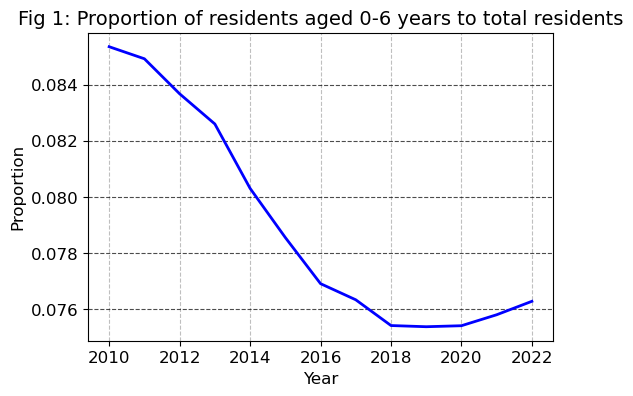

In [71]:
# Create a plot of proportion of residents aged 0-6 years to total residents

# Group the data by year and sum the columns for all municipalities
grouped_one2one = one2one.groupby('Year').sum()

# Calculate the proportion of residents aged 0-6 years to total residents
grouped_one2one['proportion'] = grouped_one2one['Residents aged 0-6 years'] / grouped_one2one['Total number of residents']

# Create a line plot of the proportion over time
fig, ax = plt.subplots(figsize=(6, 4))
grouped_one2one['proportion'].plot(kind='line', ax=ax, linewidth=2, color='blue')

# Set plot title and axis labels
ax.set_title('Fig 1: Proportion of residents aged 0-6 years to total residents', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)

# Customize tick labels and grid lines
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

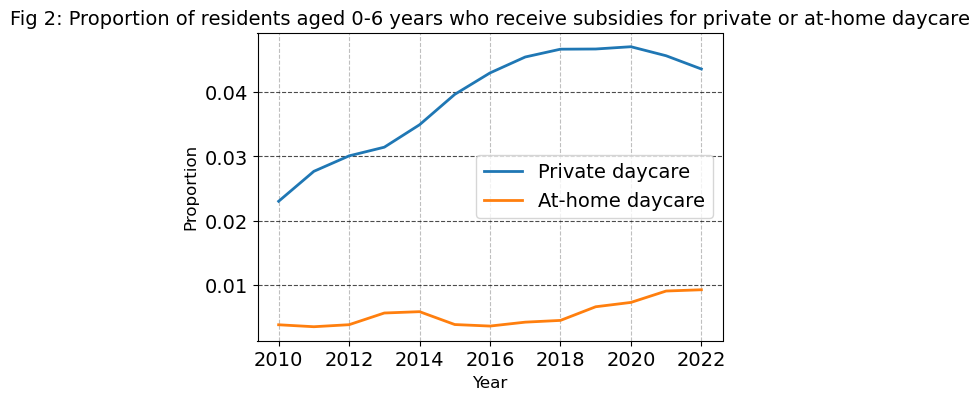

In [72]:
# Create a plot of proportion of residents aged 0-6 years who receives subsidies for private or at-home daycare to total residents aged 0-6 years

# Calculate the proportion of residents aged 0-6 years receiving either type of subsidy to total residents aged 0-6 years
grouped_one2one['proportion_private'] = grouped_one2one['pri_child'] / grouped_one2one['Residents aged 0-6 years']
grouped_one2one['proportion_home'] = grouped_one2one['own_child'] / grouped_one2one['Residents aged 0-6 years']

# Create a line plot of the proportion over time
fig, ax = plt.subplots(figsize=(6, 4))
grouped_one2one[['proportion_private', 'proportion_home']].plot(kind='line', ax=ax, linewidth=2)

# Set plot title and axis labels
ax.set_title('Fig 2: Proportion of residents aged 0-6 years who receive subsidies for private or at-home daycare', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)

# Customize tick labels and grid lines
ax.tick_params(axis='both', labelsize=14)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Customize legend
ax.legend(['Private daycare', 'At-home daycare'], fontsize=14)

plt.show()

$\large 4.$  **$\large \color{lightpurple}{Municipality}\:{Specific}\:{Development}$** 

Below we present a list of the municipalities with the most recipients of subsidies for private or at-home daycare. 

Aalborg is the municipality with the most recipients in 2022. From the child is 24 weeks till they start kindergarden, you can get a subsidity to take care of your own child at home. A person can get a subsidity uptill one year.  

In [76]:
# List of the the municipalities with the most recipients of subsidies for private or at-home daycare in 2022
top10 = one2one[one2one['Year'] == 2022].sort_values(by='pri_child', ascending=False).head(10)
# drop the unnecessary columns
top10 = top10.drop(columns=['own_child', 'own_fam','Residents aged 0-6 years', 'Total number of residents'])
# rename the columns
top10 = top10.rename(columns={'pri_child': 'Subsidy to parents who choose private day-care (children)', 'pri_fam': 'Subsidy to parents who choose private day-care (family)'})
# display the dataframe
top10

,Municipality,Year,Subsidy to parents who choose private day-care (children),Subsidy to parents who choose private day-care (family)
25,Aalborg,2022,1089,1084
150,Copenhagen,2022,894,883
847,Odense,2022,592,584
498,Hjørring,2022,321,318
651,Kolding,2022,300,296
38,Aarhus,2022,284,280
189,Esbjerg,2022,260,257
1097,Sønderborg,2022,243,241
971,Silkeborg,2022,211,208
290,Frederikshavn,2022,199,198


It is not mandatory for the municipalities to offer the "At-home daycare subsidy". Therefore, we see that the proportion of "At-home daycare subsidies" vary a lot between the municipalities.  
We have chosen to zoom in on Copenhagen and Aarhus. Copenhagen introduced a trial for the "At-home daycare subsidy" up until 2016. This explains why the proportion on 0-6 year olds is positive in this period. However, Copenhagen chose not to extend the trial in 2016 causing the proportion to be zero from 2016. In 2020, they implemented the subsidy permanently. This is why we see an increase in the proportion from zero to approximately 1,25 percent in 2021. In 2021 we also see a small decrease in the proportion of "Private daycare subsidies" in Copenhagen. This can be due to the implementation of the "At-home daycare subsidy" but can also be caused by many other factors. 
In Aarhus, the proportion of "At-home daycare subsidies" is zero throughout the whole time period, as they haven't had a trial period nor introduced it permanently. Further, the proportion of "Private daycare subsidies" has increased from approximately 0,75 percent in 2010 to approximately 2,0 percent in 2021.

In [73]:
# Create dropdown menu of municipality names 
municipalities = sorted(one2one['Municipality'].unique()) # Get a list of all municipality names
dropdown = widgets.Dropdown(options=municipalities, value=municipalities[0], description='Municipality:')
df = widgets.fixed(one2one)

# Display the dropdown and the plot
interact(figure.update_plot, municipality=dropdown, df=df);

interactive(children=(Dropdown(description='Municipality:', options=('Aabenraa', 'Aalborg', 'Aarhus', 'Alberts…

$\large 5.$  **$\large \color{lightpurple}{Conclusion}$** 

Children in the day care age (0-6 years) take up a decreasing proportion of the total population. 
The private day care is becoming more popular. 